## Easy (Linear Regression) – DS1: Predict SalePrice using 5 numeric features only; report RMSE

### 1. EDA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv('train.csv')
print(f"Shape of train data: {train_df.shape}")

# Missing values
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values (top 10):")
print(missing_values.head(10))

Shape of train data: (1460, 81)

Missing values (top 10):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


Text(0.5, 1.0, 'Distribution of SalePrice')

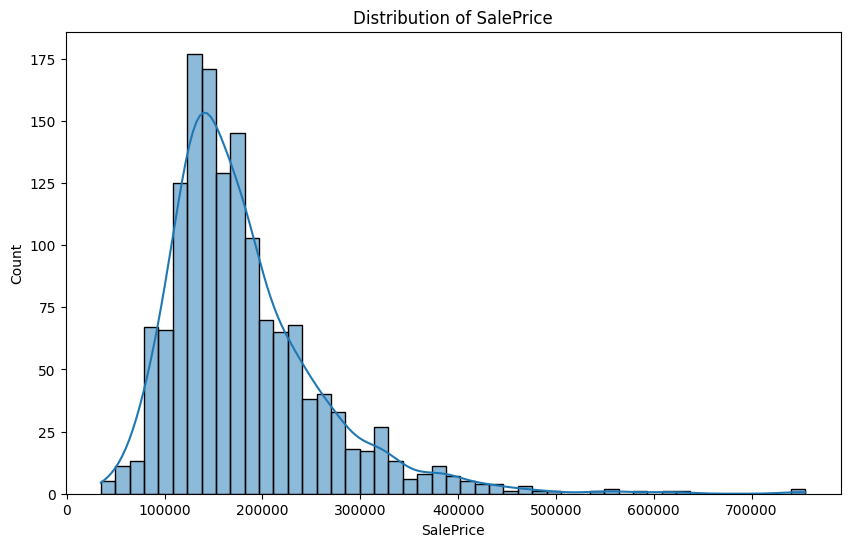

In [15]:
# Target distribution
# Plot 1: Skewness of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')

In [16]:
numeric_df = train_df.select_dtypes(include='number')
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop correlations with SalePrice:")
print(correlations.head(10))


Top correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [17]:
# Selecting 5 features: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
target = 'SalePrice'

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

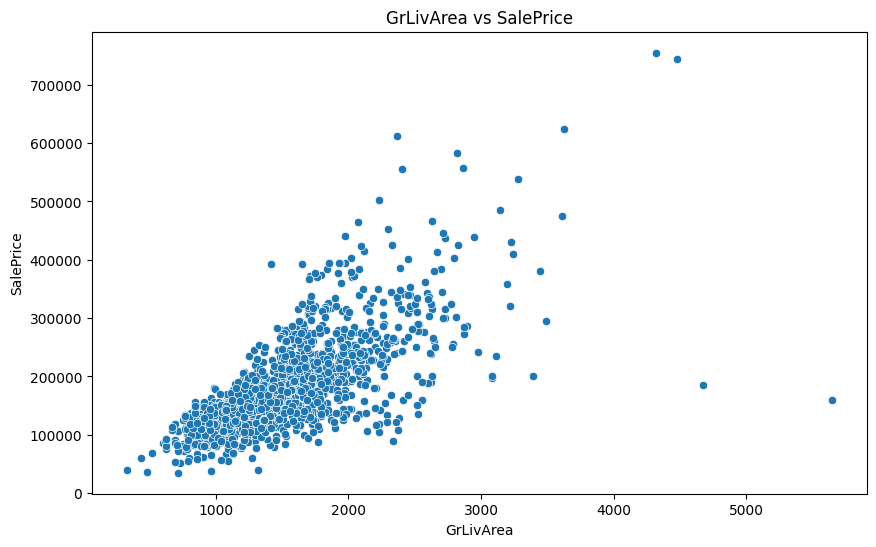

In [18]:
#Plot 2: Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')

In [19]:
# Check for missing values in selected features
print("\nMissing values in selected features:")
print(train_df[features].isnull().sum())


Missing values in selected features:
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
dtype: int64


### 2. Split

In [20]:
X = train_df[features]
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [22]:
# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
val_r2 = r2_score(y_val, y_pred_val)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation R^2: {val_r2:.4f}")

Train RMSE: 38625.41
Validation RMSE: 39979.43
Validation R^2: 0.7916
